In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
local_stats_filepath = '../../models/local_models/2022-11-2_11h33m39s/2022-11-2_11h33m39s_training_stats.csv'
fed_stats_filepath = '../../models/federated_models/2022-11-2_14h30m28s/2022-11-2_14h30m28s_training_stats.csv'

In [3]:
df_stats_local = pd.read_csv(local_stats_filepath)
df_stats_local.head()

,accuracy_score,balanced_accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,round_number,site_number
0,0.649609,0.625036,0.429752,0.650000,0.517413,[[767 168]\r\n [414 312]],1,1
1,0.671329,0.662160,0.539535,0.683358,0.602989,[[784 215]\r\n [396 464]],1,2
2,0.664593,0.653508,0.569752,0.624286,0.595774,[[738 263]\r\n [330 437]],1,3
3,0.657674,0.647007,0.535809,0.646400,0.585932,[[693 221]\r\n [350 404]],1,4
4,0.664000,0.663158,0.657010,0.601273,0.627907,[[761 376]\r\n [296 567]],1,5


In [4]:
df_stats_fed = pd.read_csv(fed_stats_filepath)
df_stats_fed.head()

,accuracy_score,balanced_accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,round_number,site_number
0,0.678507,0.664406,0.552342,0.657377,0.600299,[[726 209]\n [325 401]],1,1
1,0.689080,0.682074,0.588372,0.693151,0.636478,[[775 224]\n [354 506]],1,2
2,0.669683,0.660594,0.591917,0.626207,0.608579,[[730 271]\n [313 454]],1,3
3,0.680456,0.672322,0.587533,0.666165,0.624383,[[692 222]\n [311 443]],1,4
4,0.680000,0.669690,0.594438,0.638854,0.615846,[[847 290]\n [350 513]],1,5


In [5]:
def plot_report(df_stats_local, df_stats_fed, 
                eval_metric='accuracy_score', x_metric='round_number', split_by='site_number',
                title='site number:', figsize=(10, 10)):

    plt.figure(figsize=figsize)
    n_plots = len(df_stats_local[split_by].unique())
    for split_val in df_stats_local[split_by].unique():
        plt.subplot(n_plots, 1, split_val)
        plt.title(f'{title} {split_val}')

        df_tmp_local = df_stats_local[df_stats_local[split_by] == split_val]
        df_tmp_fed = df_stats_fed[df_stats_fed[split_by] == split_val]

        plt.plot(df_tmp_local[x_metric], df_tmp_local[eval_metric], marker='s', alpha=0.75, label=f'local')
        plt.plot(df_tmp_fed[x_metric], df_tmp_fed[eval_metric], marker='s', alpha=0.75, label=f'federated')
        plt.legend()
        plt.ylabel(eval_metric)
        plt.xticks([i+1 for i in range(n_plots)], df_stats_local[split_by].unique())
    plt.xlabel(x_metric)
    plt.tight_layout()
    plt.show()


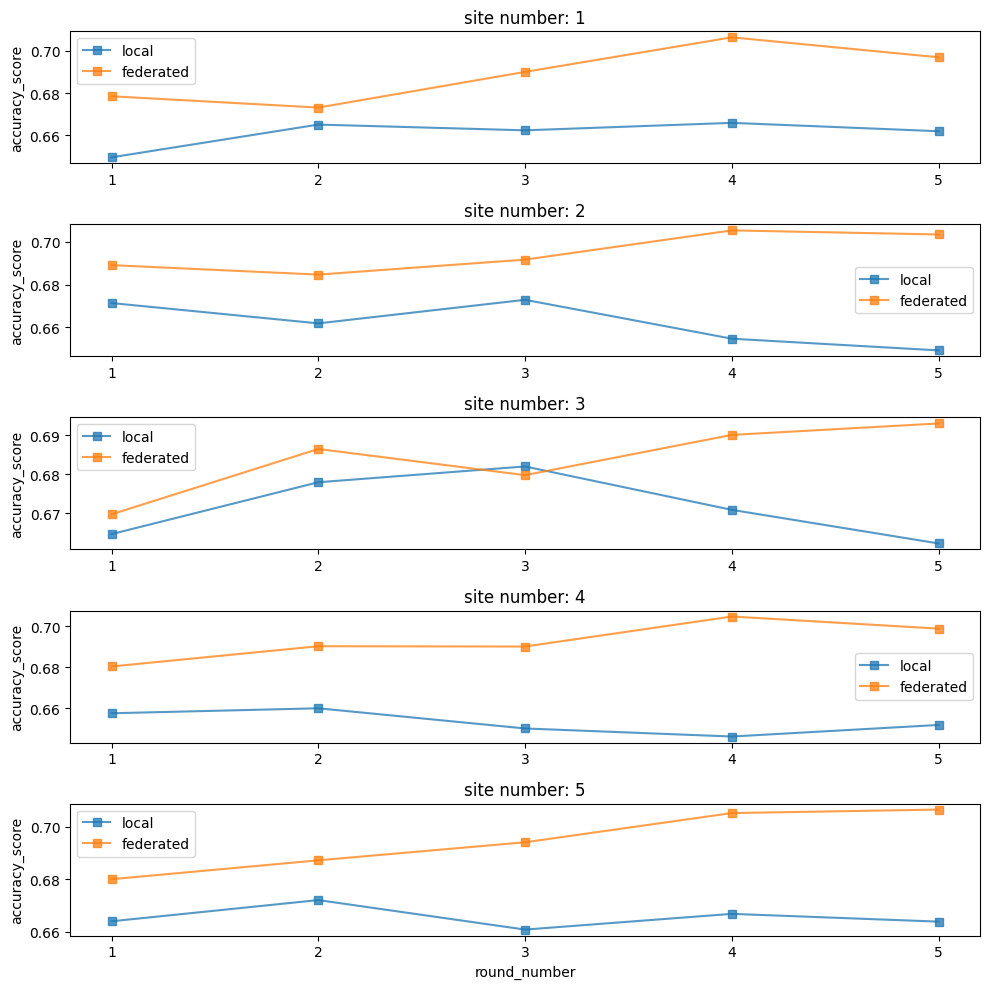

In [6]:
plot_report(df_stats_local, df_stats_fed, eval_metric='accuracy_score')

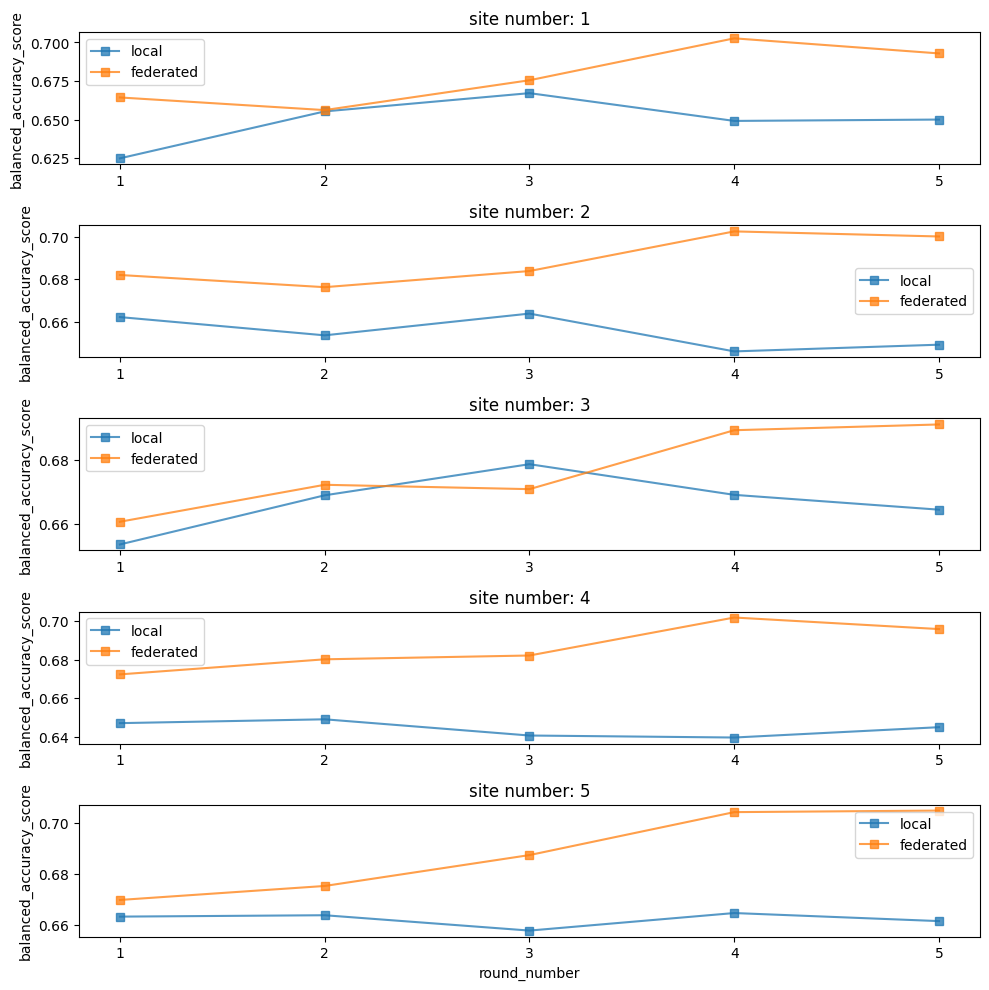

In [7]:
plot_report(df_stats_local, df_stats_fed, eval_metric='balanced_accuracy_score')

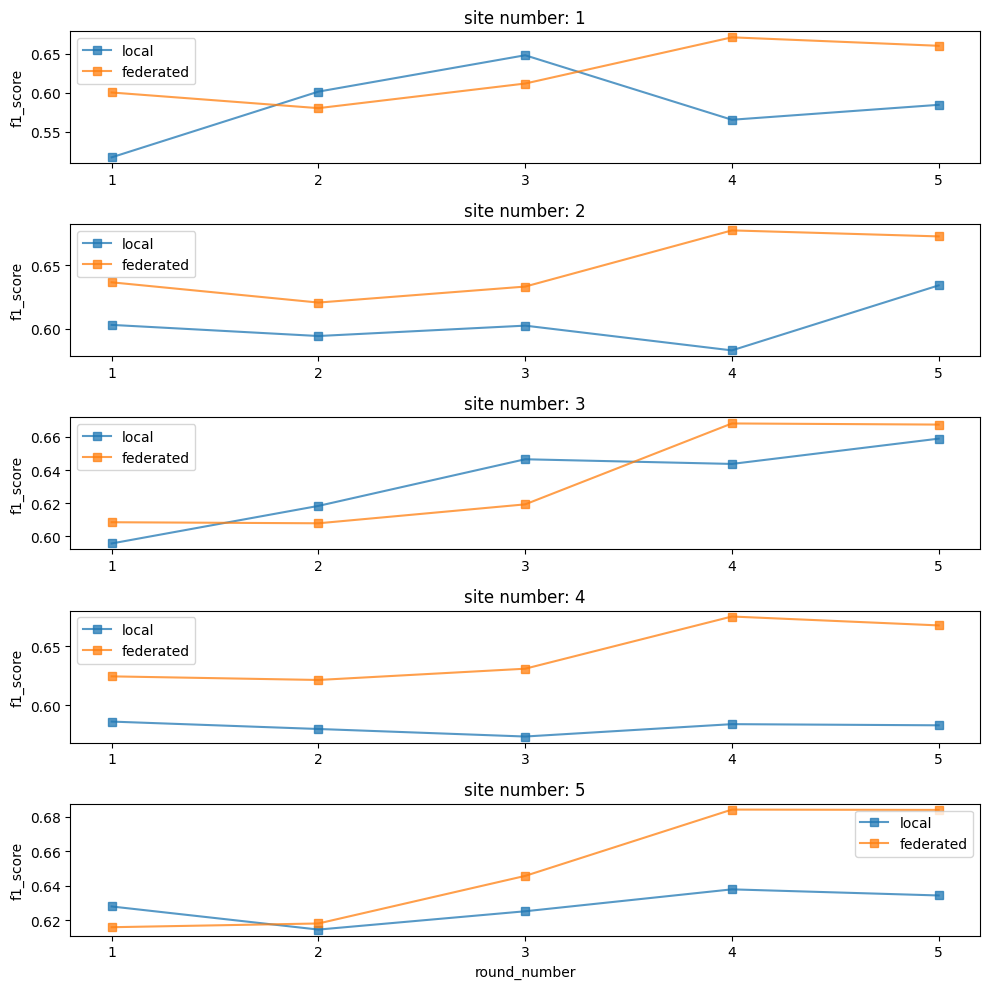

In [8]:
plot_report(df_stats_local, df_stats_fed, eval_metric='f1_score')